# Домашнее задание 1
## Sentiment Analysis in English

*deadline*: 1 октября 2024, 23:59

В этом домашнем задании вы будете работать с корпусом текстов на английском языке. Корпус описан и представлен по ссылке: https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis.


## ПРАВИЛА
1. Домашнее задание выполняется в группе до 4-х человек.
2. Домашнее задание оформляется в виде отчета в jupyter-тетрадке.
3. Отчет должен содержать: имена всех членов группы, нумерацию заданий и пунктов, которые вы выполнили, код решения, и понятное пошаговое описание того, что вы сделали.
4. Отчеты, состоящие исключительно из кода, не будут проверены и будут автоматически оценены нулевой оценкой.
5. Плагиат и любое недобросовестное цитирование приводит к обнулению оценки.
6. За каждую неделю просрочки после дедлайна начисляет по 1 штрафному баллу (например, при дедлайне 01.10.24 в 23:59 сдача ДЗ 12.10.24 ведёт к 2 штрафным баллам).
7. Бонусные баллы позволяют повысить общую оценку за ДЗ до максимальной (если были ошибки или недочеты, повлекшие снижение баллов).


:**Сюда нужно будет написать кто что конкретно выполнил**



## Часть 1. [2 балла] Эксплоративный анализ
1. Найдите топ-300 слов по частоте без учета стоп-слов.
2. Найдите топ слов, характеризующих каждую тональность отдельно.

[бонус] Найдите еще что-то интересное в корпусе (что-то специфичное для данной темы)


In [ ]:
# импортруем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# загрузим датасет
df = pd.read_csv('data.csv')
df.sample(5)

,Sentence,Sentiment
4711,Operating profit rose to EUR 26.7 mn from EUR ...,positive
5711,Okmetic Board of Directors has also decided on...,neutral
2117,Finnish industrial group Ruukki Group Plc OMX ...,neutral
3554,"The Costanza light , with an aluminum base and...",neutral
3236,"`` With this agreement , we can continue our g...",positive


In [ ]:
# удалим из все текстов разметку <br />, сделаем все буквы строчными
from nltk.tokenize import RegexpTokenizer
import re

for i, row in df.iterrows():
  try:
    row.Sentence = re.sub('\<br /\>', '', row.Sentence).lower()
  except:
    continue

In [ ]:
df.sample(20)

,Sentence,Sentiment
616,teleste has some 30 offices worldwide and is l...,neutral
5798,$spy $mitk fast 56pc dive http://stks.co/3ffn $$,negative
866,"consisting of seven interconnected units , meg...",neutral
1681,upm-kymmene has generated thirty-one consecuti...,positive
5427,$uvxy put the chum out there at key support th...,negative
5362,operating profit for the six-month period decr...,neutral
4134,managing director timo kohtam+ñki of lemmink+ñ...,neutral
577,the metal has gained 41 percent this year as d...,positive
3576,"in accordance with our strategy , we strengthe...",positive
2125,the options might include a partial or total d...,neutral


В таблице выше видим, что в датасете всего 50000 текстов отзывов, которые размечены по признаку эмоциональной окраски: позитивной и негативной.

In [ ]:
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# создадим корпус слов без учета стоп-слов, где все слова состоят только из букв
noise = stopwords.words('english')

def create_corpus(df):
  corpus = []
  for Sentence in df.Sentence:
    for token in word_tokenize(Sentence):
      if token not in noise and token.isalpha():
        corpus.append(token)
  return corpus

corpus = create_corpus(df)
print('len of corpus', len(corpus))
print('start of corpus', corpus[:10])

len of corpus 62913
start of corpus ['geosolutions', 'technology', 'leverage', 'benefon', 'gps', 'solutions', 'providing', 'location', 'based', 'search']


In [ ]:
def sorted_frequency(corpus):
  # находим частоту слов в текстах
  freq_dict = Counter(corpus)
  # сортируем слова по частоте
  freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
  return [item[0] for item in freq_dict_sorted], dict(freq_dict_sorted)

sorted_freq = sorted_frequency(corpus)[0]
print('number of unique words:', len(sorted_freq))
top300 = sorted_freq[:300]
print('top frequency')
print('len:', len(top300))
print(top300)

number of unique words: 9538
top frequency
len: 300
['eur', 'company', 'mn', 'profit', 'sales', 'finnish', 'said', 'net', 'million', 'operating', 'mln', 'period', 'year', 'group', 'finland', 'quarter', 'share', 'new', 'oyj', 'business', 'first', 'market', 'shares', 'loss', 'also', 'today', 'compared', 'services', 'euro', 'helsinki', 'corresponding', 'per', 'operations', 'percent', 'total', 'contract', 'http', 'financial', 'price', 'https', 'bank', 'decreased', 'nokia', 'products', 'hel', 'stock', 'corporation', 'according', 'pct', 'capital', 'production', 'increased', 'mobile', 'plant', 'companies', 'last', 'well', 'solutions', 'earlier', 'value', 'technology', 'rose', 'investment', 'omx', 'result', 'plc', 'deal', 'unit', 'third', 'would', 'fell', 'increase', 'service', 'order', 'second', 'construction', 'customers', 'board', 'building', 'ceo', 'billion', 'aapl', 'part', 'half', 'industry', 'expected', 'usd', 'earnings', 'oy', 'growth', 'agreement', 'maker', 'one', 'long', 'development

In [ ]:
# найдем частоту для слов внутри позитивной тональности
corpus_pos = create_corpus(df[df.Sentiment == 'positive'])
top_pos, freq_pos = sorted_frequency(corpus_pos)
print('top frequency of positive category')
print(top_pos[:20])

top frequency of positive category
['eur', 'mn', 'sales', 'company', 'profit', 'net', 'said', 'finnish', 'million', 'year', 'period', 'mln', 'operating', 'quarter', 'group', 'http', 'new', 'rose', 'increased', 'oyj']


In [ ]:
# найдем частоту для слов внутри негативной тональности
corpus_neg = create_corpus(df[df.Sentiment == 'negative'])
top_neg, freq_neg = sorted_frequency(corpus_neg)
print('top frequency of negative category')
print(top_neg[:20])

top frequency of negative category
['eur', 'mn', 'profit', 'sales', 'net', 'finnish', 'operating', 'company', 'million', 'period', 'quarter', 'loss', 'year', 'mln', 'said', 'compared', 'decreased', 'first', 'https', 'share']


In [ ]:
# составим общий DataFrame  с частотами слов внутри позитивной и негативной тональности
freq_df = pd.DataFrame.from_dict(freq_pos, orient='index', columns=['positive'])
add_df_vals = []
for word, _ in freq_df.iterrows():
  if word in freq_neg:
    add_df_vals.append(freq_neg[word])
  else:
    add_df_vals.append(0)
freq_df['negative'] = add_df_vals
for word, val in freq_neg.items():
  if word not in freq_pos:
    freq_df.loc[word] = [0, val]
freq_df['positive'] /= sum(freq_df['positive'])
freq_df['negative'] /= sum(freq_df['negative'])
freq_df

,positive,negative
eur,0.022140,0.035979
mn,0.012136,0.025451
sales,0.010968,0.012147
company,0.010308,0.009255
profit,0.010257,0.017816
...,...,...
bobe,0.000000,0.000116
acad,0.000000,0.000116
plunged,0.000000,0.000116
charge,0.000000,0.000116


In [ ]:
freq_df.head(50)

,positive,negative
eur,0.022140,0.035979
mn,0.012136,0.025451
sales,0.010968,0.012147
company,0.010308,0.009255
profit,0.010257,0.017816
net,0.010004,0.011569
said,0.009851,0.007404
finnish,0.008988,0.010296
million,0.008328,0.009139
year,0.007312,0.007982


In [ ]:
# отсортируем по разницы частот слов в разных тональностях
print('words sorted by frequency difference')
print('positive', sorted(freq_df.index, key = lambda word: freq_df.loc[word].positive - freq_df.loc[word].negative, reverse=True))
print('negative', sorted(freq_df.index, key = lambda word: freq_df.loc[word].negative - freq_df.loc[word].positive, reverse=True))

words sorted by frequency difference
positive ['rose', 'increase', 'increased', 'new', 'long', 'services', 'buy', 'business', 'said', 'agreement', 'signed', 'order', 'growth', 'group', 'grew', 'strong', 'positive', 'also', 'awarded', 'line', 'percent', 'plc', 'supply', 'good', 'technology', 'rise', 'service', 'contract', 'higher', 'position', 'customers', 'deal', 'acquisition', 'nokia', 'mobile', 'company', 'improved', 'calls', 'well', 'solutions', 'bullish', 'ceo', 'global', 'corporation', 'offer', 'says', 'respectively', 'breakout', 'significant', 'china', 'operations', 'narrowed', 'markets', 'russia', 'uk', 'provider', 'improve', 'stake', 'cooperation', 'expand', 'looking', 'network', 'base', 'board', 'volume', 'largest', 'equipment', 'focus', 'deliver', 'expansion', 'expected', 'world', 'run', 'development', 'solution', 'engineering', 'http', 'savings', 'manufacturing', 'yhoo', 'transaction', 'aims', 'able', 'provide', 'press', 'double', 'worth', 'inbev', 'plant', 'head', 'received

## Часть 2. [2 балла] Модели представления слов
Обучите модель представления слов (word2vec, GloVe, fastText или любую другую) на материале корпуса.
1. Продемонстрируйте, как работает поиск синонимов, ассоциаций, лишних слов в обученной модели.
2. Визуализируйте топ-300 слов по частоте без учета стоп-слов (п. 1.1) с помощью TSNE или UMAP (https://umap-learn.readthedocs.io).


In [ ]:
# импортируем необходимые библиотеки
# выбрали word2vec, т.к. ее использовали на семинаре
import gensim
import string

from gensim.models import word2vec

In [ ]:
def create_corpus_version2(df):
  corpus = []
  for Sentence in df.Sentence:
    temp = []
    for token in word_tokenize(Sentence):
      if token not in noise and token.isalpha():
        temp.append(token)
    corpus.append(temp)
  return corpus

sentences = create_corpus_version2(df)

In [ ]:
# Обучаем модель на материале корпуса
model = word2vec.Word2Vec(sentences, workers=4, vector_size=300, min_count=10, window=10, sample=1e-3)

In [ ]:
model = word2vec.Word2Vec(sentences,
                          workers=4,
                          vector_size=200,  # Уменьшим размер вектора
                          min_count=2,  # Понизим минимальный порог для частоты слов
                          window=7,  # Уменьшим размер окна
                          sample=1e-4,  # Стандартная частота семплирования
                          sg=1,  # Оставляем skip-gram (или можно попробовать sg=0 для CBOW)
                          hs=0,  # Отключаем softmax (оставляем негативное семплирование)
                          negative=5,  # Уменьшаем количество негативных примеров
                          ns_exponent=0.75,  # Можно понизить до 0.5 для другой динамики
                          alpha=0.03,  # Увеличиваем начальную скорость обучения
                          min_alpha=0.0007,  # Поддерживаем минимальную скорость обучения выше
                          epochs=50)  # Увеличиваем количество эпох


In [ ]:
# Сохраняем веса модели
model.save("word2vec.model")

In [ ]:
cur_list = [word for word, sim in model.wv.most_similar(positive=["market", "investment"], negative=["debt"], topn=3)]
print("Associations of words market - debt + investment are: ", ', '.join(cur_list))

Associations of words market - debt + investment are:  commitment, developing, students


In [ ]:
# ассоциации
cur_list = [word for word, sim in model.wv.most_similar(positive=["company", "profit"], negative=["loss"], topn=3)]
print("Associations of words company - loss + profit are: ", ', '.join(cur_list))
cur_list = [word for word, sim in model.wv.most_similar(positive=["share", "growth"], negative=["decrease"], topn=3)]
print("Associations of words share - decrease + growth are: ", ', '.join(cur_list))
cur_list = [word for word, sim in model.wv.most_similar(positive=["market", "investment"], negative=["debt"], topn=3)]
print("Associations of words market - debt + investment are: ", ', '.join(cur_list))

# синонимы
print("=======")
print("Synonyms of the word decrease are: ", ', '.join([word for word, sim in model.wv.most_similar('decrease', topn=3)]))
print("Synonyms of the word increase are: ", ', '.join([word for word, sim in model.wv.most_similar('increase', topn=3)]))
print("Synonyms of the word money are: ", ', '.join([word for word, sim in model.wv.most_similar('money', topn=3)]))

# лишние слова
print("=======")
print("The word that doesn't fit with [classic, romance, show] is: ", model.wv.doesnt_match("classic romance show".split()))
print("The word that doesn't fit with [love, romance, violence] is: ", model.wv.doesnt_match("love romance violence".split()))
print("The word that doesn't fit with [violence, drug, crime, smile] is: ", model.wv.doesnt_match("violence drug crime smile".split()))

Associations of words company - loss + profit are:  finnish, net, eur
Associations of words share - decrease + growth are:  premium, brcm, alus
Associations of words market - debt + investment are:  commitment, developing, students
Synonyms of the word decrease are:  repurchases, distributable, decaliters
Synonyms of the word increase are:  registered, warrants, collect
Synonyms of the word money are:  bbby, suffering, popping
The word that doesn't fit with [classic, romance, show] is:  classic
The word that doesn't fit with [love, romance, violence] is:  love
The word that doesn't fit with [violence, drug, crime, smile] is:  drug


ВИЗУАЛИЗАЦИЯ

In [ ]:
top300_vec = []
for word in top300:
    if word in model.wv:
        top300_vec.append(model.wv[word])
    else:
        continue

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=50, metric='cosine').fit_transform(np.array(top300_vec))

In [ ]:
tsne_df = pd.DataFrame(tsne, columns = ['x', 'y'])
tsne_df['word'] = top300
tsne_df

,x,y,word
0,0.414948,2.725202,eur
1,2.771161,1.233875,company
2,-0.358018,2.186197,mn
3,0.467283,2.811957,profit
4,-0.561507,3.560918,sales
...,...,...,...
295,-5.872534,3.226414,via
296,0.437312,7.895785,sold
297,-4.623651,1.174681,cut
298,-5.802134,5.253324,like


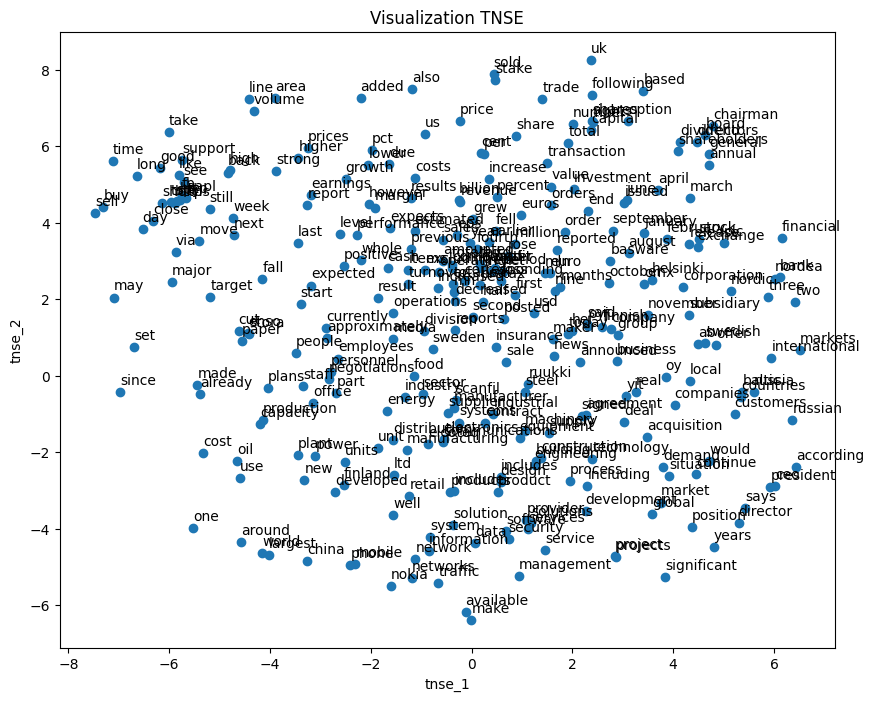

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df.x, tsne_df.y)
for i in range(tsne_df.shape[0]):
    plt.annotate(tsne_df.word[i], (tsne_df.x[i], tsne_df.y[i] + 0.2))
plt.title("Visualization TNSE")
plt.xlabel("tnse_1")
plt.ylabel("tnse_2")
plt.show()

## Часть 3. [5 баллов] Классификация текстов
В этой задаче требуется по тексту (Sentence в датасете) предсказать его тональность (Sentiment в датасете). Основная мера качества – macro $F_1$.

Обучите несколько классификаторов и сравните их между собой. Оцените качество классификаторов на каждом из классв. Какие классы чаще всего оказываются перепутаны? Связаны ли ошибки со смыслом текстов?

0. [0 баллов] Разбейте корпус на три выборки: обучающую, отладочную и тестовую в соотношении 80 %, 10 % и 10 %. Тестовая выборка должна использоваться исключительно для тестирования моделей, обучающая и отладочная — для выбора модели и параметров.
1. [1 балл] Используйте fastText в качестве baseline-классификатора.
2. [2 балла] Используйте сверточные сети в качестве более продвинутого классификатора. Поэкспериментируйте с количеством и размерностью фильтров, используйте разные размеры окон, попробуйте использовать $k$-max pooling.
3. [2 балла] Попробуйте расширить обучающее множество за счет аугментации данных. Если вам понадобится словарь синонимов, можно использовать WordNet (ниже вы найдете примеры).

[бонус] Используйте ваш любимый классификатор и любые (честные) способы повышения качества классификации и получите macro $F_1$ больше бейслайна.



In [ ]:
! git clone https://github.com/facebookresearch/fastText.git
! pip3 install fastText/.

Cloning into 'fastText'...
remote: Enumerating objects: 3998, done.
remote: Counting objects: 100% (1057/1057), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 3998 (delta 922), reused 884 (delta 856), pack-reused 2941 (from 1)
Receiving objects: 100% (3998/3998), 8.30 MiB | 18.92 MiB/s, done.
Resolving deltas: 100% (2529/2529), done.
Processing ./fastText
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4296143 sha256=b633044be07da745b48ef4c339f4e8f8137c1f77a23ec2b0ef9f910500c1f2a2
  Stored in directory: /tmp/pip-ephem-wheel-cache-air2db6j/wheels/8b/05/af/3cfae069d904597d44b309c956601b611bdf8967bcbe968903
Successfully built fasttext


In [ ]:
from sklearn import metrics
import fasttext
import os
import torch
from collections import defaultdict
from tqdm import tqdm_notebook

In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
neutral,3130
positive,1852
negative,860


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset: 80% train, 10% validation, 10% test
train_data, temp_data = train_test_split(df, test_size=0.2, stratify=df['Sentiment'], random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['Sentiment'], random_state=42)

# Check the distribution of sentiments in each split
train_dist = train_data['Sentiment'].value_counts(normalize=True)
val_dist = val_data['Sentiment'].value_counts(normalize=True)
test_dist = test_data['Sentiment'].value_counts(normalize=True)

train_dist, val_dist, test_dist


(Sentiment
 neutral     0.535844
 positive    0.316927
 negative    0.147229
 Name: proportion, dtype: float64,
 Sentiment
 neutral     0.535959
 positive    0.316781
 negative    0.147260
 Name: proportion, dtype: float64,
 Sentiment
 neutral     0.535043
 positive    0.317949
 negative    0.147009
 Name: proportion, dtype: float64)

In [ ]:
# Preparing data for fastText (writing to a text file as fastText uses text inputs for training)
train_file = 'train_fasttext.txt'
val_file = 'val_fasttext.txt'
test_file = 'test_fasttext.txt'

# Convert the data into fastText format: __label__Sentiment Sentence
def prepare_fasttext_format(data, file_path):
    with open(file_path, 'w') as f:
        for _, row in data.iterrows():
            f.write(f'__label__{row["Sentiment"]} {row["Sentence"]}\n')

# Prepare train, validation, and test data
prepare_fasttext_format(train_data, train_file)
prepare_fasttext_format(val_data, val_file)
prepare_fasttext_format(test_data, test_file)

train_file, val_file, test_file


('train_fasttext.txt', 'val_fasttext.txt', 'test_fasttext.txt')

In [ ]:
from sklearn.utils import resample

# Разделение данных по классам
neutral = train_data[train_data['Sentiment'] == 'neutral']
positive = train_data[train_data['Sentiment'] == 'positive']
negative = train_data[train_data['Sentiment'] == 'negative']

# Определяем максимальный размер класса (чтобы сделать все классы одинаковыми по количеству)
max_size = len(neutral)

# Применяем oversampling для классов positive и negative
positive_upsampled = resample(positive, replace=True, n_samples=max_size, random_state=42)
negative_upsampled = resample(negative, replace=True, n_samples=max_size, random_state=42)

# Объединяем заново данные, создавая сбалансированный датасет
train_data = pd.concat([neutral, positive_upsampled, negative_upsampled])

# Перемешиваем данные после oversampling
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Проверяем новые размеры классов
print(train_data['Sentiment'].value_counts())



Sentiment
positive    2504
negative    2504
neutral     2504
Name: count, dtype: int64


In [ ]:
# Функция для очистки данных от пустых строк и пропущенных меток
def clean_data(x, y):
    # Удаляем строки, где 'Sentence' или 'Sentiment' пустые
    clean_x = x[~x.isnull() & (x != '')]
    clean_y = y.loc[clean_x.index]
    return clean_x, clean_y

# Очистка данных
train_x_clean, train_y_clean = clean_data(train_x, train_y)
dev_x_clean, dev_y_clean = clean_data(dev_x, dev_y)
test_x_clean, test_y_clean = clean_data(test_x, test_y)

# Создание файлов для тренировки с очищенными данными
create_ft_input('train_ft_input.txt', train_x_clean, train_y_clean)

# Обучение модели fastText
ft_model = fasttext.train_supervised('train_ft_input.txt')

# Оценка модели на dev и test данных
print('macro F1 score on dev data:', test_ftmodel(ft_model, dev_x_clean, dev_y_clean))
print('macro F1 score on test data:', test_ftmodel(ft_model, test_x_clean, test_y_clean))

# F1 score для положительных и отрицательных отзывов на dev данных
print('F1 score on dev data for positive reviews:', test_ftmodel(ft_model, dev_x_clean, dev_y_clean, 'positive'))
print('F1 score on dev data for negative reviews:', test_ftmodel(ft_model, dev_x_clean, dev_y_clean, 'negative'))


macro F1 score on dev data: 0.7621143026511027
macro F1 score on test data: 0.6655367691703274
F1 score on dev data for positive reviews: 0.8084151472650771
F1 score on dev data for negative reviews: 0.6442630820931349


In [ ]:
# Разделение данных по меткам для расчетов Precision и Recall
pos_dev_x = dev_x[dev_y == 'positive']
pos_dev_y = dev_y[dev_y == 'positive']
neg_dev_x = dev_x[dev_y == 'negative']
neg_dev_y = dev_y[dev_y == 'negative']

# Создание файлов для положительных и отрицательных отзывов
create_ft_input('pos_dev_input.txt', pos_dev_x, pos_dev_y)
_, pos_prec, pos_rec = ft_model.test('pos_dev_input.txt')

create_ft_input('neg_dev_input.txt', neg_dev_x, neg_dev_y)
_, neg_prec, neg_rec = ft_model.test('neg_dev_input.txt')

# Вывод Precision и Recall для положительных и отрицательных отзывов
print('Precision on positive reviews:', pos_prec)
print('Recall on positive reviews:', pos_rec)

print('Precision on negative reviews:', neg_prec)
print('Recall on negative reviews:', neg_rec)


Precision on positive reviews: 0.7780777537796977
Recall on positive reviews: 0.7780777537796977
Precision on negative reviews: 0.7802325581395348
Recall on negative reviews: 0.7802325581395348


In [ ]:
%%time
URL = "https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip"
FILE = "fastTextVectors"

if os.path.isdir(FILE):
    print("Vectors already downloaded.")
else:
    !wget -P $FILE $URL
    !unzip $FILE/crawl-300d-2M.vec.zip -d $FILE

--2024-09-30 16:49:06--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.33.183.29, 13.33.183.121, 13.33.183.33, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.33.183.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1523785255 (1.4G) [application/zip]
Saving to: ‘fastTextVectors/crawl-300d-2M.vec.zip’

crawl-300d-2M.vec.z 100%[===================>]   1.42G   123MB/s    in 19s     

2024-09-30 16:49:27 (74.8 MB/s) - ‘fastTextVectors/crawl-300d-2M.vec.zip’ saved [1523785255/1523785255]

Archive:  fastTextVectors/crawl-300d-2M.vec.zip
  inflating: fastTextVectors/crawl-300d-2M.vec  
CPU times: user 626 ms, sys: 91.6 ms, total: 718 ms
Wall time: 1min 33s


In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [ ]:
import os
import fasttext
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# Проверка доступности GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

# 1. Токенизация текста и построение словаря
def tokenize(texts):
    max_len = 0
    tokenized_texts = []
    word2idx = {'<pad>': 0, '<unk>': 1}  # Начинаем с токенов <pad> и <unk>
    idx = 2  # Начальный индекс для новых токенов

    for text in texts:
        tokenized_text = text.split()  # Простая токенизация (можно улучшить)
        tokenized_texts.append(tokenized_text)

        # Добавляем токены в словарь
        for token in tokenized_text:
            if token not in word2idx:
                word2idx[token] = idx
                idx += 1

        max_len = max(max_len, len(tokenized_text))

    return tokenized_texts, word2idx, max_len

# 2. Преобразование текста в индексы
def encode(tokenized_texts, word2idx, max_len):
    input_ids = []
    for tokenized_text in tokenized_texts:
        tokenized_text += ['<pad>'] * (max_len - len(tokenized_text))  # Паддинг до max_len
        input_id = [word2idx.get(token, word2idx['<unk>']) for token in tokenized_text]
        input_ids.append(input_id)
    return np.array(input_ids, dtype=np.int32)

# 3. Загрузка предобученных векторов fastText
def load_pretrained_vectors(word2idx, fname):
    print("Loading pretrained vectors...")
    fin = open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())

    embeddings = np.random.uniform(-0.25, 0.25, (len(word2idx), d))  # Инициализируем случайными векторами
    embeddings[word2idx['<pad>']] = np.zeros((d,))  # Вектор паддинга

    count = 0
    for line in tqdm_notebook(fin):
        tokens = line.rstrip().split(' ')
        word = tokens[0]
        if word in word2idx:
            count += 1
            embeddings[word2idx[word]] = np.array(tokens[1:], dtype=np.float32)

    print(f"There are {count} / {len(word2idx)} pretrained vectors found.")
    return embeddings

# 4. Подготовка данных
train_x, train_y = train_data['Sentence'], train_data['Sentiment']
dev_x, dev_y = df['Sentence'], df['Sentiment']
test_x, test_y = test_data['Sentence'], test_data['Sentiment']

# Токенизация
print("Tokenizing...")
tokenized_texts_train, word2idx, max_len = tokenize(list(train_x))
tokenized_texts_dev, _, _ = tokenize(list(dev_x))
tokenized_texts_test, _, _ = tokenize(list(test_x))

# 1. Найдем максимальную длину для всех наборов данных (train, dev, test)
all_texts = list(train_x) + list(dev_x) + list(test_x)
tokenized_texts_all, _, max_len_all = tokenize(all_texts)

# Токенизация для каждого набора данных с использованием общего max_len
tokenized_texts_train, _, _ = tokenize(list(train_x))
tokenized_texts_dev, _, _ = tokenize(list(dev_x))
tokenized_texts_test, _, _ = tokenize(list(test_x))

# Преобразуем тексты в индексы, используя общий max_len
train_inputs = encode(tokenized_texts_train, word2idx, max_len_all)
dev_inputs = encode(tokenized_texts_dev, word2idx, max_len_all)
test_inputs = encode(tokenized_texts_test, word2idx, max_len_all)

# Загрузка предобученных векторов fastText
embeddings = load_pretrained_vectors(word2idx, "fastTextVectors/crawl-300d-2M.vec")
embeddings = torch.tensor(embeddings)

# Преобразование меток в числовой формат
def sentiment_to_label(sentiment):
    if sentiment == 'positive':
        return 2
    elif sentiment == 'neutral':
        return 1
    else:
        return 0

train_labels = [sentiment_to_label(label) for label in train_y]
dev_labels = [sentiment_to_label(label) for label in dev_y]
test_labels = [sentiment_to_label(label) for label in test_y]

# Создание тензоров
train_inputs, dev_inputs, test_inputs, train_labels, dev_labels, test_labels = \
    tuple(torch.tensor(data) for data in [train_inputs, dev_inputs, test_inputs, train_labels, dev_labels, test_labels])

batch_size = 50

train_data = TensorDataset(train_inputs, train_labels)
train_dataloader = DataLoader(train_data, shuffle=True, batch_size=batch_size)

dev_data = TensorDataset(dev_inputs, dev_labels)
dev_dataloader = DataLoader(dev_data, shuffle=False, batch_size=batch_size)

test_data = TensorDataset(test_inputs, test_labels)
test_dataloader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

# 5. Определение CNN модели с k-max pooling
class CNN_NLP(nn.Module):
    def __init__(self, pretrained_embedding=None, freeze_embedding=False, vocab_size=None, embed_dim=300,
                 filter_sizes=[3, 4, 5], num_filters=[100, 100, 100], kmax=[1, 1, 1], num_classes=3, dropout=0.5):
        super(CNN_NLP, self).__init__()
        if pretrained_embedding is not None:
            self.vocab_size, self.embed_dim = pretrained_embedding.shape
            self.embedding = nn.Embedding.from_pretrained(pretrained_embedding, freeze=freeze_embedding)
        else:
            self.embed_dim = embed_dim
            self.embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=self.embed_dim, padding_idx=0)

        self.conv1d_list = nn.ModuleList([
            nn.Conv1d(in_channels=self.embed_dim, out_channels=num_filters[i], kernel_size=filter_sizes[i])
            for i in range(len(filter_sizes))
        ])

        self.fc = nn.Linear(np.sum(num_filters) * kmax[0], num_classes)
        self.dropout = nn.Dropout(p=dropout)
        self.kmax_list = kmax

    def count_kmax(self, x, k, dim=2):
        index = x.topk(k, dim=dim)[1].sort(dim=dim)[0]
        return x.gather(dim, index)

    def forward(self, input_ids):
        x_embed = self.embedding(input_ids).float()
        x_reshaped = x_embed.permute(0, 2, 1)
        x_conv_list = [F.relu(conv1d(x_reshaped)) for conv1d in self.conv1d_list]
        x_pool_list = [self.count_kmax(x_conv, self.kmax_list[i]) for i, x_conv in enumerate(x_conv_list)]
        x_fc = torch.cat([torch.flatten(x_pool, start_dim=1) for x_pool in x_pool_list], dim=1)
        logits = self.fc(self.dropout(x_fc))
        return logits

# Инициализация модели
def initilize_model(pretrained_embedding=None, freeze_embedding=False, vocab_size=None, embed_dim=300,
                    filter_sizes=[3, 4, 5], num_filters=[100, 100, 100], kmax=[1, 1, 1], num_classes=3, dropout=0.5,
                    learning_rate=0.01):
    cnn_model = CNN_NLP(pretrained_embedding=pretrained_embedding, freeze_embedding=freeze_embedding,
                        vocab_size=vocab_size, embed_dim=embed_dim, filter_sizes=filter_sizes, num_filters=num_filters,
                        kmax=kmax, num_classes=num_classes, dropout=dropout)
    cnn_model.to(device)
    optimizer = optim.Adadelta(cnn_model.parameters(), lr=learning_rate, rho=0.95)
    return cnn_model, optimizer


No GPU available, using the CPU instead.
Tokenizing...
Loading pretrained vectors...


<ipython-input-55-4c0358a32c62>:61: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for line in tqdm_notebook(fin):


0it [00:00, ?it/s]

There are 8680 / 11698 pretrained vectors found.


====Current filter [2, 3, 4]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   1.030169   |  0.909586  | 0.555130  | 34.775930
   2    |   0.827284   |  0.726855  | 0.711263  | 33.694364
   3    |   0.684332   |  0.602472  | 0.745923  | 33.973294
   4    |   0.589499   |  0.539015  | 0.768605  | 33.857553
   5    |   0.526952   |  0.514438  | 0.778852  | 34.126521

Training complete! Best f1score: {best_f1score:.6f}%.


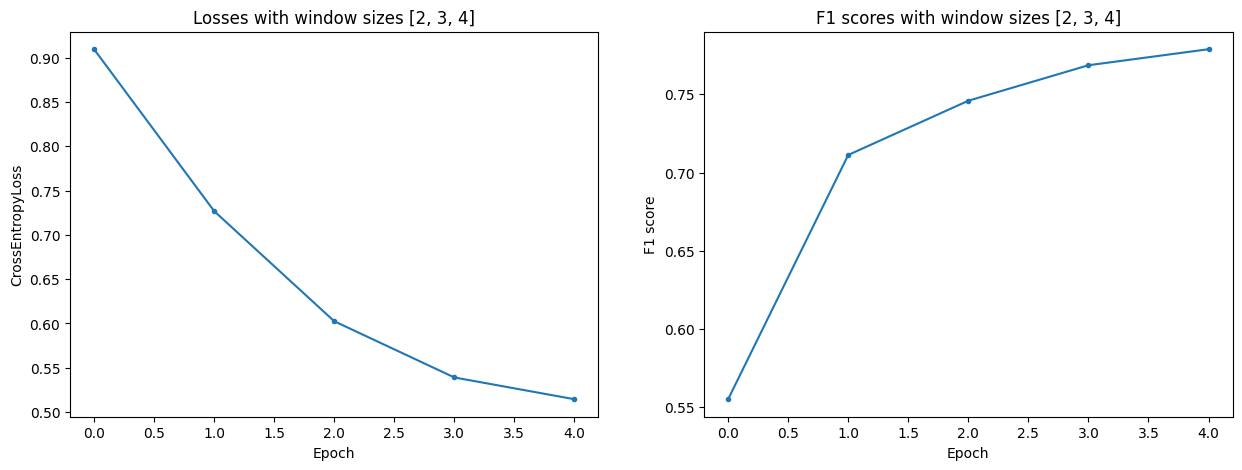

====Current filter [3, 4, 5]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   0.961070   |  0.819737  | 0.660160  | 35.811826
   2    |   0.705400   |  0.640440  | 0.736189  | 35.406860
   3    |   0.574859   |  0.560704  | 0.764469  | 35.257917
   4    |   0.497179   |  0.538704  | 0.763475  | 35.318025
   5    |   0.442564   |  0.461618  | 0.800003  | 35.487065

Training complete! Best f1score: {best_f1score:.6f}%.


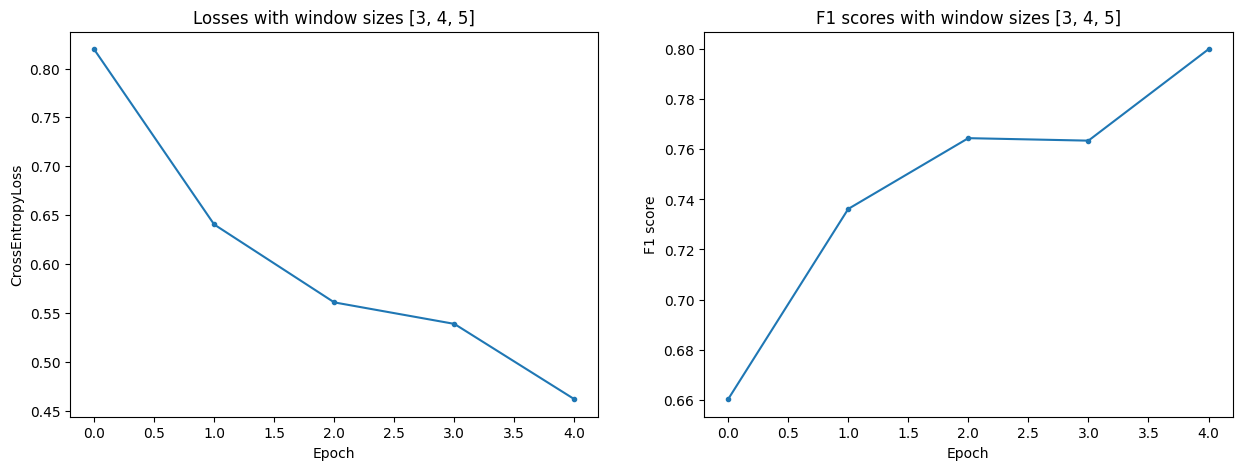

====Current filter [2, 4, 6]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   0.974490   |  0.802659  | 0.670156  | 34.999284
   2    |   0.696190   |  0.618943  | 0.752131  | 35.893958
   3    |   0.560467   |  0.534396  | 0.777117  | 35.017439
   4    |   0.486951   |  0.540112  | 0.782564  | 42.476980
   5    |   0.431325   |  0.452758  | 0.795153  | 35.794484

Training complete! Best f1score: {best_f1score:.6f}%.


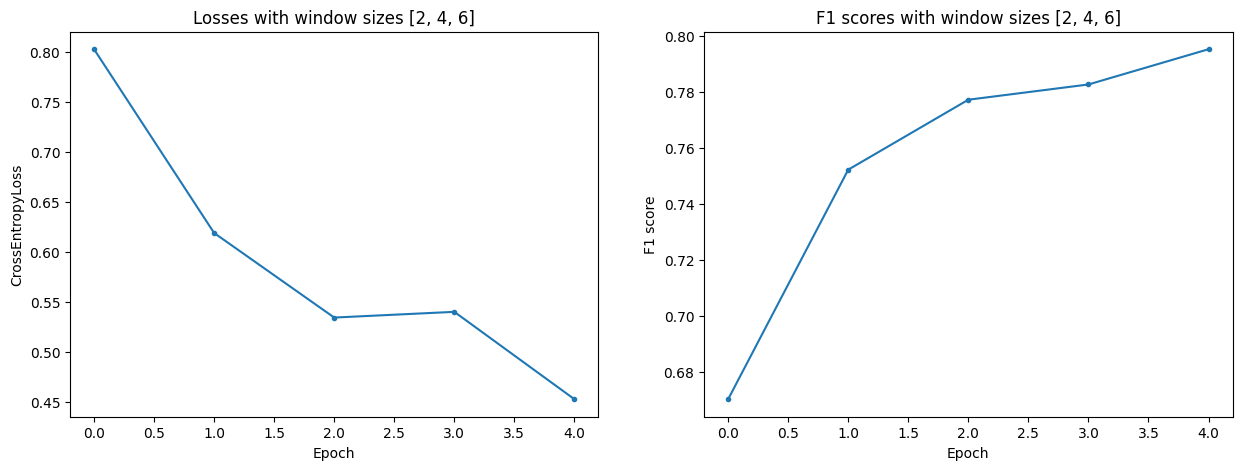

====Current filter [2, 6, 7]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   0.942260   |  0.741208  | 0.707828  | 32.341629
   2    |   0.641410   |  0.570888  | 0.765118  | 32.075083
   3    |   0.520167   |  0.471691  | 0.774368  | 31.287623
   4    |   0.445917   |  0.478826  | 0.793521  | 31.136630
   5    |   0.405932   |  0.422735  | 0.801244  | 31.073814

Training complete! Best f1score: {best_f1score:.6f}%.


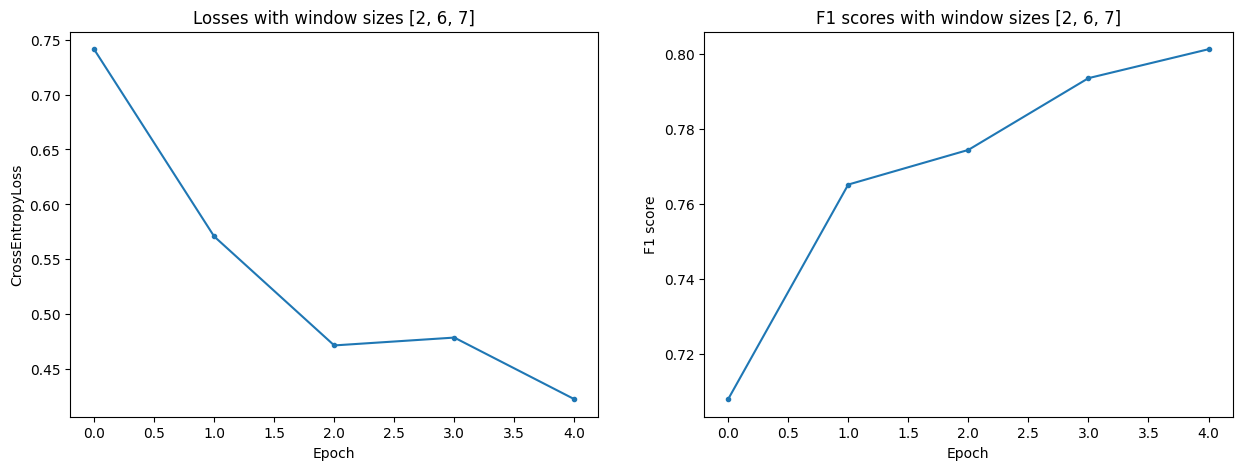

====Current filter [6, 7, 8]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   0.893983   |  0.650809  | 0.754069  | 37.292030
   2    |   0.575606   |  0.509311  | 0.777429  | 37.693339
   3    |   0.452736   |  0.537073  | 0.785854  | 36.457825
   4    |   0.384167   |  0.438813  | 0.805868  | 36.832855
   5    |   0.339843   |  0.372716  | 0.811716  | 36.184374

Training complete! Best f1score: {best_f1score:.6f}%.


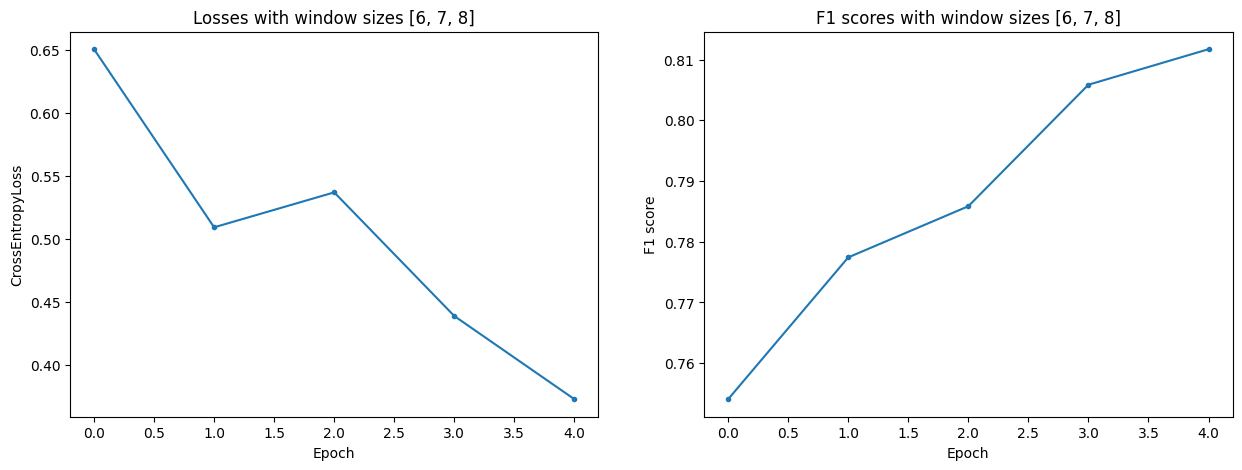

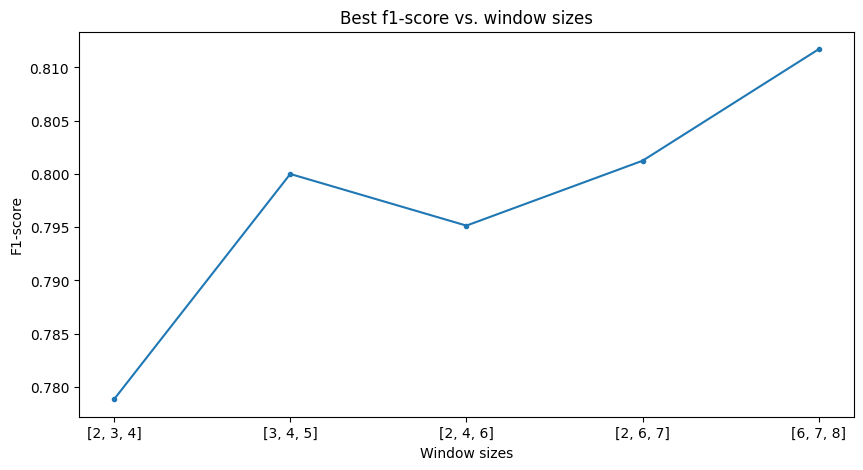

<ipython-input-56-f142f538b9e5>:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model = torch.load('best_model_windowsize.pt')


Test loss on best model: 0.6291734029849371
Test macro F1 score on best model: 0.6521533664369666


In [ ]:
import random
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import metrics
import matplotlib.pyplot as plt

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility."""
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, optimizer, train_dataloader, val_dataloader=None, epochs=10):
    """Train the CNN model."""
    best_f1score = 0
    all_val_losses, all_val_scores = [], []

    print("Start training...\n")
    print(f"{'Epoch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val f1-score':^9} | {'Elapsed':^9}")
    print("-"*60)

    for epoch_i in range(epochs):
        t0_epoch = time.time()
        total_loss = 0
        model.train()

        for step, batch in enumerate(train_dataloader):
            b_input_ids, b_labels = tuple(t.to(device) for t in batch)
            model.zero_grad()
            logits = model(b_input_ids)
            loss = loss_fn(logits, b_labels)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()

        avg_train_loss = total_loss / len(train_dataloader)

        # Evaluation
        if val_dataloader is not None:
            val_loss, val_f1score = evaluate(model, val_dataloader)
            all_val_losses.append(val_loss)
            all_val_scores.append(val_f1score)
            if val_f1score > best_f1score:
                best_f1score = val_f1score
            time_elapsed = time.time() - t0_epoch
            print(f"{epoch_i + 1:^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_f1score:^9.6f} | {time_elapsed:^9.6f}")

    print("\nTraining complete! Best f1score: {best_f1score:.6f}%.")
    return all_val_losses, all_val_scores, best_f1score

def evaluate(model, val_dataloader):
    """Evaluate the model on validation set."""
    model.eval()
    val_f1score = []
    val_loss = []

    for batch in val_dataloader:
        b_input_ids, b_labels = tuple(t.to(device) for t in batch)
        with torch.no_grad():
            logits = model(b_input_ids)
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())
        preds = torch.argmax(logits, dim=1).flatten()
        f1score = metrics.f1_score(b_labels.cpu(), preds.cpu(), average='macro')
        val_f1score.append(f1score)

    val_loss = np.mean(val_loss)
    val_f1score = np.mean(val_f1score)

    return val_loss, val_f1score

# Set seed for reproducibility
set_seed(42)

# Number of epochs
epochs = 5

# Window sizes for filters
windowsizes = [[2, 3, 4], [3, 4, 5], [2, 4, 6], [2, 6, 7], [6, 7, 8]]

best_scores_windowsizes = []
max_best_score = 0

for windows in windowsizes:
    print("====Current filter {}=====".format(windows))
    cnn_model, optimizer = initilize_model(pretrained_embedding=embeddings,
                                            freeze_embedding=False,
                                            filter_sizes=windows,
                                            num_filters=[10] * len(windows),  # Same number of filters for each window size
                                            kmax=[1] * len(windows),  # K-max pooling
                                            learning_rate=0.25,
                                            dropout=0.5)
    val_losses_windowsize, val_scores_windowsize, best_score_windowsize = train(cnn_model, optimizer, train_dataloader, dev_dataloader, epochs=epochs)
    best_scores_windowsizes.append(best_score_windowsize)

    if best_score_windowsize > max_best_score:
        max_best_score = best_score_windowsize
        torch.save(cnn_model, 'best_model_windowsize.pt')

    # Plotting the losses and scores
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].plot(np.arange(epochs), val_losses_windowsize, marker='.')
    axes[0].set_title("Losses with window sizes " + str(windows))
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("CrossEntropyLoss")

    axes[1].plot(np.arange(epochs), val_scores_windowsize, marker='.')
    axes[1].set_title("F1 scores with window sizes " + str(windows))
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("F1 score")
    plt.show()

# Plotting best f1-scores for different window sizes
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(best_scores_windowsizes)), best_scores_windowsizes, marker='.')
plt.title("Best f1-score vs. window sizes")
plt.xlabel("Window sizes")
plt.ylabel("F1-score")
plt.xticks(np.arange(len(windowsizes)), [str(window) for window in windowsizes])
plt.show()

# Load and evaluate the best model on the test set
best_model = torch.load('best_model_windowsize.pt')
best_model.eval()
best_model_test_loss, best_model_test_f1score = evaluate(best_model, test_dataloader)
print("Test loss on best model:", best_model_test_loss)
print("Test macro F1 score on best model:", best_model_test_f1score)


## Часть 4. [1 балл] Итоги
Напишите краткое резюме проделанной работы. Обобщите все полученные вами результаты и сделайте выводы.